# PHM Data Challenge 2014

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from collections import Counter

## Data Loading

In [3]:
consumption = pd.read_csv("../data/Train - Part Consumption.csv")

consumption.head()

,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1.0
1,A174613,0,R707,P991287,1.0
2,A174613,0,R707,P169319,1.0
3,A060723,0,R193,P184448,0.0
4,A174613,0,R707,P097048,1.0


In [4]:
usage = pd.read_csv("../data/Train - Usage.csv")
usage.head()

,Asset,Time,Use
0,A403193,5,31194.652034
1,A403193,17,31223.536355
2,A403193,56,31362.706261
3,A403193,124,31701.440562
4,A403193,144,31724.489666


In [5]:
failures = pd.read_csv("../data/Train - Failures.csv")
failures.head()

,Asset,Time
0,A403193,137
1,A403193,146
2,A403193,155
3,A403193,229
4,A403193,420


## Data Analysis

In [6]:
consumption.describe()

,Time,Quantity
count,270830.000000,270830.000000
mean,378.872691,3.565059
std,212.522371,20.420610
min,0.000000,-15.000000
25%,195.000000,1.000000
50%,388.000000,1.000000
75%,567.000000,2.000000
max,730.000000,3000.000000


In [7]:
usage.describe()

,Time,Use
count,22828.000000,22828.000000
mean,374.998730,30273.978469
std,211.670945,2528.890997
min,0.000000,25740.475447
25%,194.000000,28471.064870
50%,377.000000,30516.599911
75%,562.000000,31878.612314
max,730.000000,187239.128532


In [8]:
failures.describe()

,Time
count,9199.000000
mean,379.170345
std,210.243071
min,0.000000
25%,199.000000
50%,389.000000
75%,563.000000
max,730.000000


In [9]:
c = Counter(consumption.Reason)
reason_count = c.most_common()
reason_count

[('R707', 136714),
 ('R565', 58284),
 ('R193', 39668),
 ('R417', 12960),
 ('R446', 11090),
 ('R364', 7056),
 ('R119', 2143),
 ('R783', 1858),
 ('R044', 393),
 ('R606', 349),
 ('R575', 262),
 ('R064', 42),
 ('R396', 10),
 ('R782', 1)]

In [10]:
c = Counter(failures.Asset)
failures_count = c.most_common()
failures_count

[('A624962', 19),
 ('A344737', 19),
 ('A546754', 17),
 ('A396638', 17),
 ('A613089', 17),
 ('A196573', 17),
 ('A288494', 16),
 ('A122955', 16),
 ('A130356', 16),
 ('A968343', 16),
 ('A838297', 16),
 ('A073164', 16),
 ('A067512', 16),
 ('A824908', 15),
 ('A748065', 15),
 ('A354676', 15),
 ('A599433', 15),
 ('A689043', 15),
 ('A278781', 15),
 ('A943170', 14),
 ('A181324', 14),
 ('A175822', 14),
 ('A203444', 14),
 ('A402608', 14),
 ('A744243', 14),
 ('A317141', 14),
 ('A446813', 14),
 ('A592525', 14),
 ('A547881', 14),
 ('A550035', 14),
 ('A024432', 14),
 ('A621532', 14),
 ('A531932', 13),
 ('A399220', 13),
 ('A367237', 13),
 ('A333832', 13),
 ('A499073', 13),
 ('A926119', 13),
 ('A283388', 13),
 ('A250298', 13),
 ('A152340', 13),
 ('A733174', 13),
 ('A496983', 13),
 ('A616364', 13),
 ('A429540', 13),
 ('A519059', 13),
 ('A355669', 13),
 ('A558858', 12),
 ('A920271', 12),
 ('A439865', 12),
 ('A457170', 12),
 ('A010961', 12),
 ('A989821', 12),
 ('A423193', 12),
 ('A210011', 12),
 ('A481735

## Data Preprocessing

In [11]:
indexes = consumption.query("Quantity <= 0").index
consumption.drop(indexes, inplace=True)
consumption.reset_index(inplace=True)

In [12]:
consumption.Quantity.describe()

count    266137.000000
mean          3.628079
std          20.594277
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        3000.000000
Name: Quantity, dtype: float64

## Article plots reproduction

In [13]:
assets_un = consumption.Asset.unique()
print(assets_un)
print(len(assets_un))

['A311482' 'A174613' 'A555548' ... 'A855324' 'A539580' 'A906011']
1913


100%|██████████| 1913/1913 [00:04<00:00, 441.10it/s]


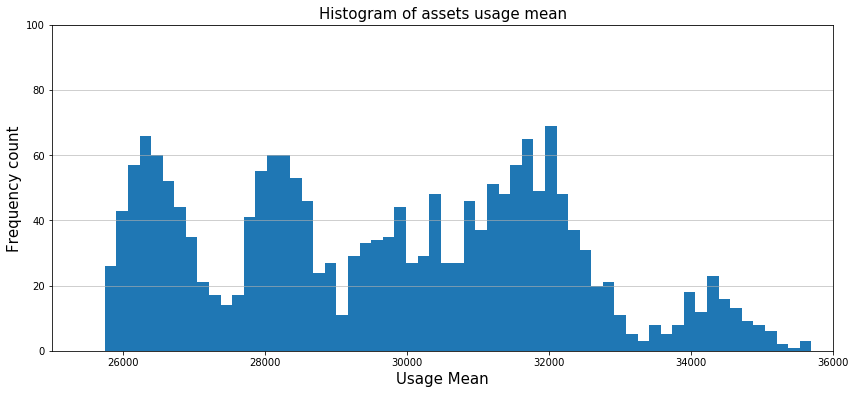

In [14]:
mean_usages = []
std_usages = []
for asset in tqdm(assets_un):
    asset_usages = usage.query("Asset == @asset").Use.to_list()
    if len(asset_usages) > 0:
        mean_usages.append(np.mean(asset_usages))
        std_usages.append(np.std(asset_usages))

plt.figure(figsize=(14, 6))
plt.hist(mean_usages, bins=500)
plt.grid(axis="y", alpha=0.75)
plt.xlim(25000, 36000)
plt.ylim(0, 100)
plt.xlabel("Usage Mean", fontsize=15)
plt.ylabel("Frequency count", fontsize=15)
plt.title("Histogram of assets usage mean", fontsize=15)
plt.show()

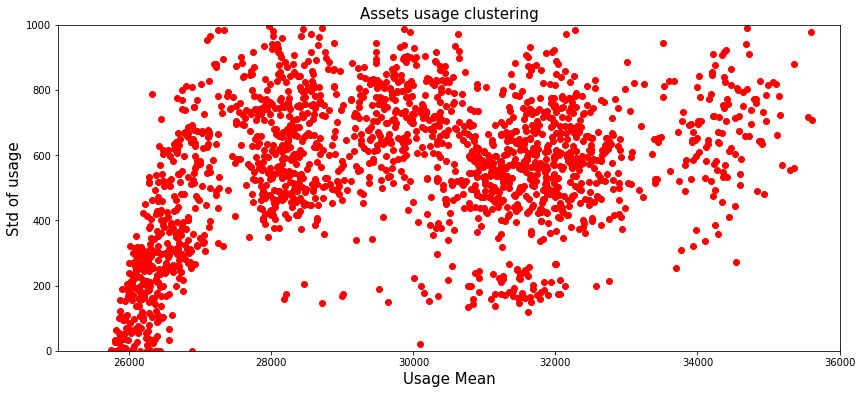

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(mean_usages, std_usages, "ro")
plt.xlim(25000, 36000)
plt.ylim(0, 1000)
plt.xlabel("Usage Mean", fontsize=15)
plt.ylabel("Std of usage", fontsize=15)
plt.title("Assets usage clustering", fontsize=15)
plt.show()

100%|██████████| 1913/1913 [00:04<00:00, 472.96it/s]


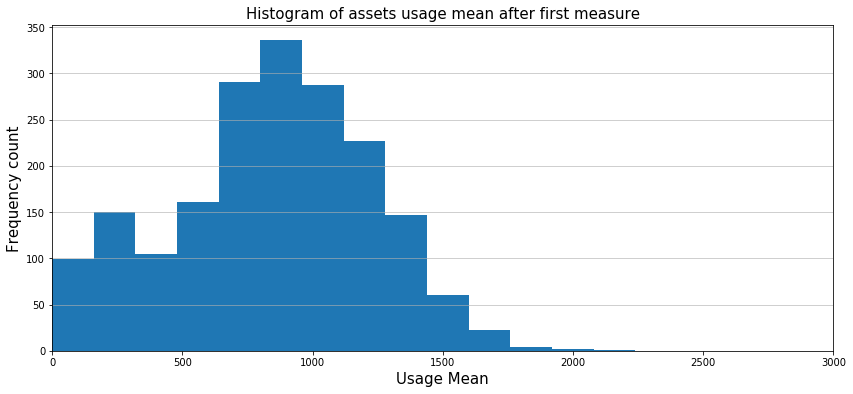

In [16]:
mean_usages = []
std_usages = []
for asset in tqdm(assets_un):
    asset_usages = usage.query("Asset == @asset").Use.to_list()
    if len(asset_usages) > 0:
        mean_usages.append(np.mean(asset_usages) - asset_usages[0])
        std_usages.append(np.std(asset_usages))

plt.figure(figsize=(14, 6))
plt.hist(mean_usages, bins=500)
plt.grid(axis="y", alpha=0.75)
plt.xlim(0, 3000)
plt.xlabel("Usage Mean", fontsize=15)
plt.ylabel("Frequency count", fontsize=15)
plt.title("Histogram of assets usage mean after first measure", fontsize=15)
plt.show()

In [17]:
parts = consumption.Part.unique()
print(parts)
print(len(parts))

['P361646' 'P991287' 'P169319' ... 'P364693' 'P136942' 'P835531']
3162


In [18]:
assets_cons, parts_cons = consumption.Asset, consumption.Part

assets_parts = []
for asset, part in zip(assets_cons, parts_cons):
    assets_parts.append(asset + "_" + part)
assets_parts = np.unique(assets_parts)

print(len(assets_parts))

140704


In [19]:
# parts_usages = []
# parts_usages_mean = []
# parts_usages_std = []
# parts_usages_count = []
# assets = []
# parts = []
# for asset_part in tqdm(assets_parts):
#     asset, part = asset_part.split("_")
#     consumptions_times = consumption.query("Asset == @asset and Part == @part")

#     if len(consumptions_times) > 0:
#         try:
#             usage_asset_mean_each_t = mean_usages[list(assets_un).index(asset)] / 730
#             assets.append(asset)
#             parts.append(part)

#             usages_snapshots = []
#             for cons_time in consumptions_times.Time:
#                 usages_snapshots.append(cons_time * usage_asset_mean_each_t)

#             parts_usages.append(usages_snapshots)
#             parts_usages_mean.append(np.mean(usages_snapshots))
#             parts_usages_std.append(np.std(usages_snapshots))
#             parts_usages_count.append(len(usages_snapshots))
#         except IndexError:
#             pass

# data = {
#     "asset": assets,
#     "part": parts,
#     "consumptions": parts_usages,
#     "consumption_usage_mean": parts_usages_mean,
#     "consumption_usage_std": parts_usages_std,
#     "consumption_counts": parts_usages_count,
# }

# parts_usage_df = pd.DataFrame(data)
# parts_usage_df.to_csv("../data/parts_usages.csv", index=False)

parts_usage_df = pd.read_csv("../data/parts_usages.csv")

In [20]:
parts_usage_df.sort_values("consumption_counts", ascending=False).head(10)

,asset,part,consumptions,consumption_usage_mean,consumption_usage_std,consumption_counts
8213,A068651,P566684,"[87.53484637202473, 87.53484637202473, 87.5348...",355.989760,351.737877,39
17861,A135851,P566684,"[178.7725646851738, 178.7725646851738, 178.772...",399.864078,310.683288,37
130126,A933880,P566684,"[42.35323115429147, 77.10460030653063, 77.1046...",176.897383,141.317525,37
133961,A959904,P566684,"[38.79074878729941, 38.79074878729941, 38.7907...",106.749735,76.462101,32
10204,A082830,P566684,"[543.072647914044, 543.072647914044, 543.07264...",559.918429,30.384960,30
86574,A611210,P566684,"[50.878036823474055, 225.7712884041661, 227.36...",613.716319,430.262585,30
49248,A359848,P566684,"[326.8139641298471, 326.8139641298471, 326.813...",475.318585,125.243201,29
133062,A950136,P566684,"[45.59795147814876, 45.59795147814876, 45.5979...",154.218786,106.356544,28
87586,A616364,P566684,"[306.7695459225468, 306.7695459225468, 306.769...",483.150421,164.477820,28
101503,A708728,P566684,"[37.91656545534402, 37.91656545534402, 37.9165...",223.111219,116.504916,28


In [21]:
parts_usage_df.sort_values("consumption_counts", ascending=False).part.unique()[:5]

array(['P566684', 'P102391', 'P738107', 'P361646', 'P953340'],
      dtype=object)

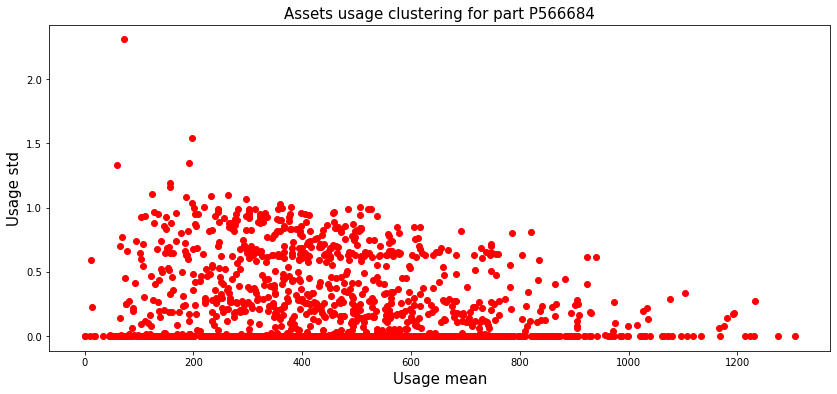

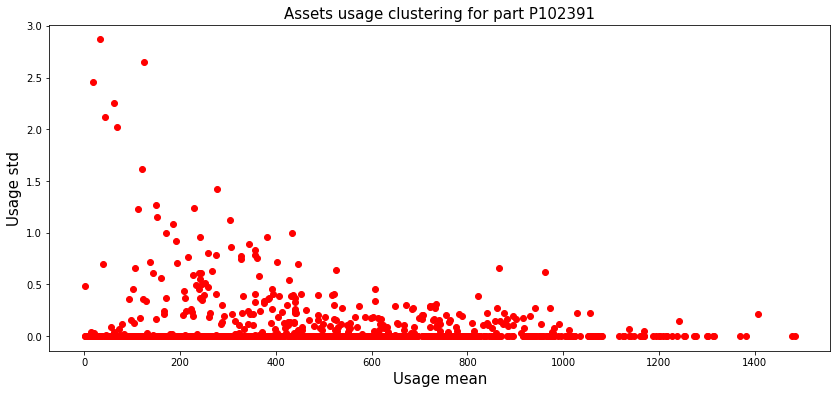

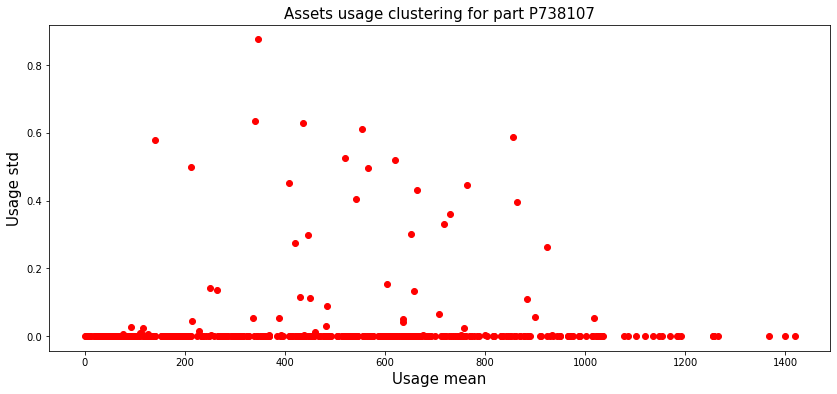

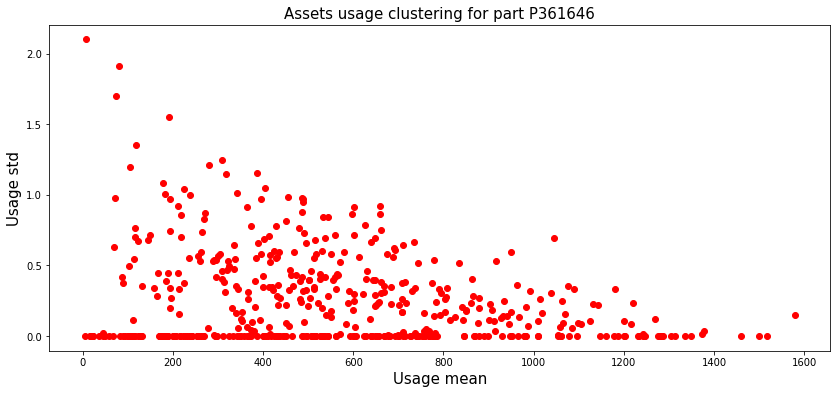

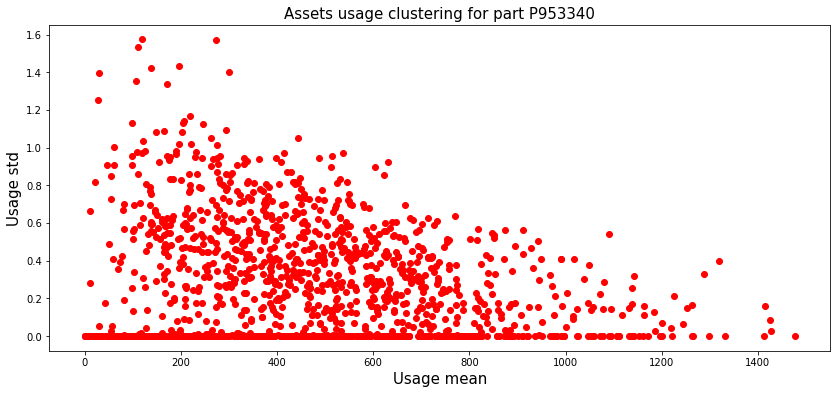

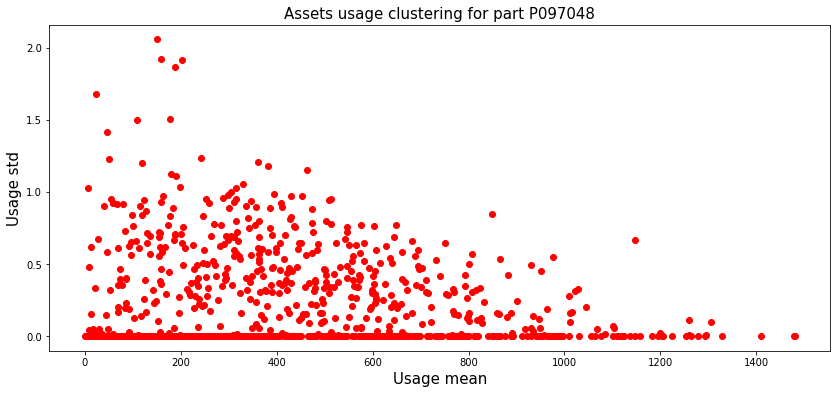

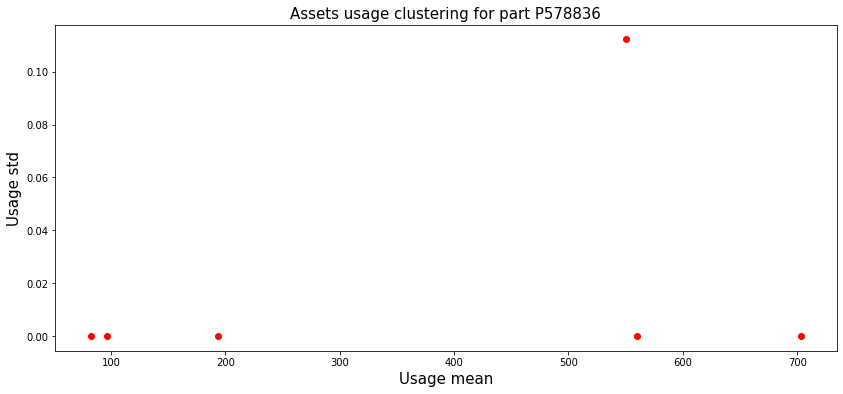

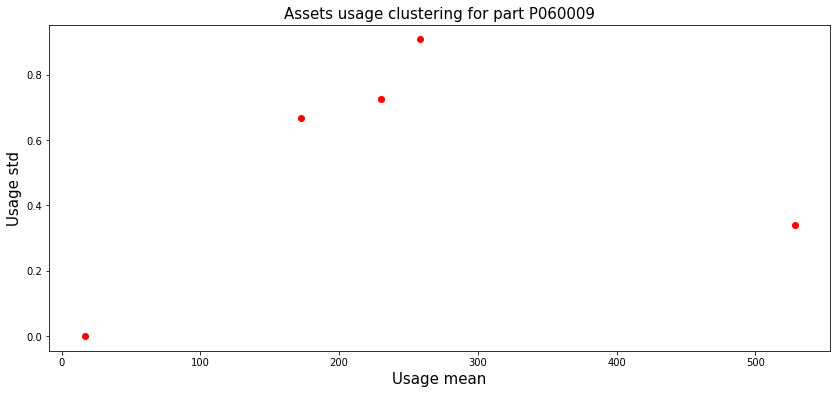

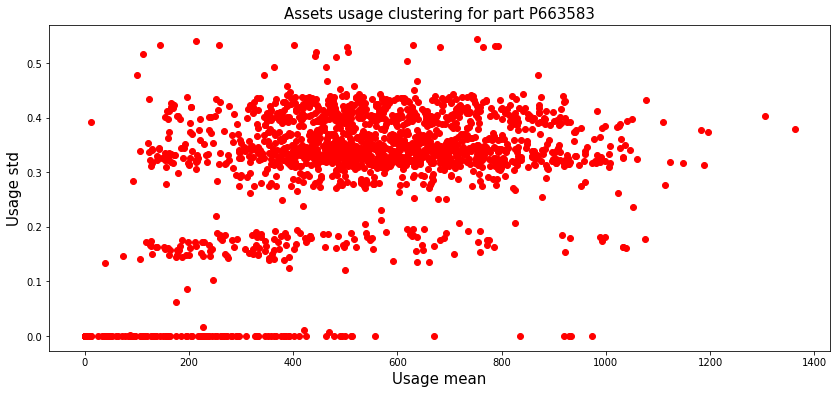

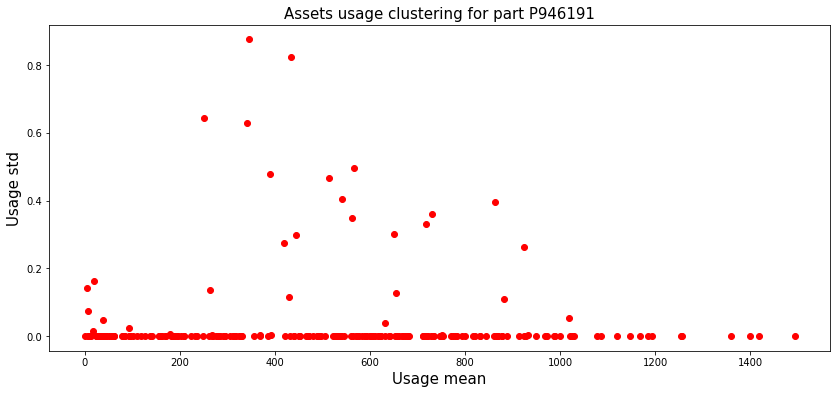

In [22]:
parts = parts_usage_df.sort_values("consumption_counts", ascending=False).part.unique()[
    :10
]

for part in parts:
    std_over_mean = list(
        map(
            lambda x, y: x / y if y != 0 else 0,
            parts_usage_df.query("part == @part").consumption_usage_std.to_list(),
            parts_usage_df.query("part == @part").consumption_usage_mean.to_list(),
        )
    )
    plt.figure(figsize=(14, 6))
    plt.plot(
        parts_usage_df.query("part == @part").consumption_usage_mean.to_list(),
        std_over_mean,
        "ro",
    )
    plt.xlabel("Usage mean", fontsize=15)
    plt.ylabel("Usage std", fontsize=15)
    plt.title("Assets usage clustering for part {}".format(part), fontsize=15)
    plt.show()

## Training Data construction

In [23]:
train_df = consumption.copy()
train_df.drop("index", axis=1, inplace=True)

In [24]:
train_df.shape

(266137, 5)

In [25]:
train_df["Failure"] = [False] * train_df.shape[0]
train_df["Time_failure"] = [0] * train_df.shape[0]
train_df["Time_diff"] = [0] * train_df.shape[0]
train_df["Usage_on_failure"] = [0] * train_df.shape[0]

In [26]:
train_df.head()

,Asset,Time,Reason,Part,Quantity,Failure,Time_failure,Time_diff,Usage_on_failure
0,A311482,0,R417,P361646,1.0,False,0,0,0
1,A174613,0,R707,P991287,1.0,False,0,0,0
2,A174613,0,R707,P169319,1.0,False,0,0,0
3,A174613,0,R707,P097048,1.0,False,0,0,0
4,A174613,0,R707,P169319,1.0,False,0,0,0


In [27]:
# for fail_asset, fail_time in tqdm(list(failures.itertuples(index=False, name=None))):
#     possible_cons = consumption.query("Time <= @fail_time and Asset == @fail_asset")

#     usage_next = usage.query("Time >= @fail_time and Asset == @fail_asset").head(1)
#     usage_prev = usage.query("Time <= @fail_time and Asset == @fail_asset").tail(1)

#     usage_failure_value = 0
#     if len(usage_next) > 0 and len(usage_prev) > 0:
#         usage_prev_time = usage_prev.iloc[0, 1]
#         usage_prev_value = usage_prev.iloc[0, 2]
#         usage_next_time = usage_next.iloc[0, 1]
#         usage_next_value = usage_next.iloc[0, 2]

#         if usage_next_time - usage_prev_time > 0:
#             usage_failure_value = fail_time - usage_prev_time
#             usage_failure_value /= usage_next_time - usage_prev_time
#             usage_failure_value *= usage_next_value - usage_prev_value
#             usage_failure_value += usage_prev_value
#         else:
#             usage_failure_value = usage_next_value

#     inserted_parts = []
#     for index, cons_part in possible_cons[::-1].iterrows():
#         if cons_part.Part not in inserted_parts:
#             train_df.loc[index, "Failure"] = True
#             train_df.loc[index, "Time_failure"] = fail_time
#             train_df.loc[index, "Time_diff"] = (
#                 fail_time - consumption.loc[index, "Time"]
#             )
#             train_df.loc[index, "Usage_on_failure"] = usage_failure_value
#             inserted_parts.append(cons_part.Part)

# train_df.to_csv("../data/train_features.csv", index=False)

train_df = pd.read_csv("../data/train_features.csv")

In [28]:
train_df.query("Failure==True")

,Asset,Time,Reason,Part,Quantity,Failure,Time_failure,Time_diff,Usage_on_failure
0,A311482,0.00000,R417,P361646,1.0,True,0.445205,0.445205,29066.424327
7,A174613,0.00000,R707,P097048,1.0,True,0.124658,0.124658,31190.029929
9,A174613,0.00000,R707,P991287,1.0,True,0.784932,0.784932,32660.951097
10,A174613,0.00000,R707,P566684,1.0,True,0.124658,0.124658,31190.029929
11,A555548,0.00000,R565,P374736,1.0,True,0.698630,0.698630,31504.212968
...,...,...,...,...,...,...,...,...,...
265305,A049130,0.99863,R364,P459171,8.0,True,1.000000,0.001370,0.000000
265306,A049130,0.99863,R364,P322912,2.0,True,1.000000,0.001370,0.000000
265307,A049130,0.99863,R364,P999688,8.0,True,1.000000,0.001370,0.000000
265308,A049130,0.99863,R364,P843990,2.0,True,1.000000,0.001370,0.000000


This train set above does not really express others examples by considering some negative failures instances. So, I'll do this on Usage_on_failure column, by just measuring the usage on the Time column.

In [29]:
# train_df.drop(["Time_failure", "Time_diff", "Usage_on_failure"], axis=1, inplace=True)

# for index, row in tqdm(train_df[["Asset", "Time"]].iterrows()):
#     time = row.Time
#     asset = row.Asset
#     usage_next = usage.query("Time >= @time and Asset == @asset").head(1)
#     usage_prev = usage.query("Time <= @time and Asset == @asset").tail(1)

#     usage_value = 0
#     if len(usage_next) > 0 and len(usage_prev) > 0:
#         usage_prev_time = usage_prev.iloc[0, 1]
#         usage_prev_value = usage_prev.iloc[0, 2]
#         usage_next_time = usage_next.iloc[0, 1]
#         usage_next_value = usage_next.iloc[0, 2]

#         if usage_next_time - usage_prev_time > 0:
#             usage_value = row.Time - usage_prev_time
#             usage_value /= usage_next_time - usage_prev_time
#             usage_value *= usage_next_value - usage_prev_value
#             usage_value += usage_prev_value
#         else:
#             usage_value = usage_next_value

#     train_df.loc[index, "Usage_on_time"] = usage_value

# train_df.to_csv("../data/train_features_usage.csv", index=False)

train_df = pd.read_csv("../data/train_features_usage.csv")